### Importación de Tensorflow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data( )

11493376/11490434 [==============================] - 0s 0us/step


### verificando los datos de prueba

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

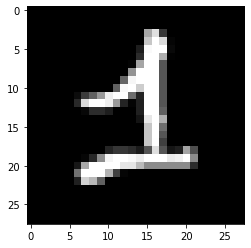

In [6]:
imagendemo=x_train[24]
plt.imshow(imagendemo,cmap='gray')

In [7]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

## Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [9]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [11]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [12]:
#EN TÉRMINOS GENERALES: Los autoencoder deben de tener arquitectura espejo, para realizar correctamente la decodificación. 784-50-2-50-784
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1=50, #primera capa con 50 pixeles. La imagen original tiene 784
               n_nodes_hl2=10, #segunda capa con 2 pixeles, está comprobado que funciona con 2 para reconstruir. Con 10-15 funciona mejor
               n_nodes_hl3=50,
               n_classes=784):
    self.h1LW = tf.Variable(np.random.normal(size=(784, n_nodes_hl1)),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.normal(size=(n_nodes_hl1)),name="hl1bias",dtype="float32")
    self.h2LW = tf.Variable(np.random.normal(size=(n_nodes_hl1, n_nodes_hl2)),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.normal(size=(n_nodes_hl2)),name="hl2bias",dtype="float32")
    self.h3LW = tf.Variable(np.random.normal(size=(n_nodes_hl2, n_nodes_hl3)),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.normal(size=(n_nodes_hl3)),name="hl3bias",dtype="float32")
    self.outW = tf.Variable(np.random.normal(size=(n_nodes_hl3, n_classes)),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.normal(size=(n_classes)),name="outbias",dtype="float32")
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.h3LW,self.h3LB,self.outW,self.outB]          
  def __call__(self,x): 
      # Declarando la arquitectura

      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.tanh(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.tanh(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.tanh(l3)

      l4 = tf.add(tf.matmul(l3,self.outW), self.outB)
      output = tf.nn.relu(l4)
      return output

In [13]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 784), dtype=float32, numpy=
array([[0.       , 1.9513354, 3.5381095, ..., 0.3272009, 0.3951751,
        0.       ],
       [2.4953666, 8.063675 , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [6.6892858, 0.       , 3.6158996, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 6.399375 , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.3137885, 0.       , 0.       , ..., 5.9124794, 0.       ,
        0.       ],
       [0.       , 8.484781 , 3.1787727, ..., 6.5098877, 2.4745061,
        0.       ]], dtype=float32)>

Seleccionar un optimizador 

In [14]:
#optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=1e-1)
optimizador = tf.keras.optimizers.Adam(learning_rate=.0001 )

### Definir las metricas a usar

In [15]:
#La métrica cambia a regresión
train_loss = tf.keras.metrics.Mean(name='train_loss')


test_loss = tf.keras.metrics.Mean(name='test_loss')


### Calculo de gradientes y ajuste 

In [16]:
#En este caso las etiquetas son iguales a la entrada
@tf.function
def train_step(model,tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #calculo de una funcion de error 
    loss = tf.reduce_mean(tf.math.squared_difference(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  

In [17]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.math.squared_difference(labels, predictions))

  test_loss(t_loss)
  

## función de entrenamiento  y prueba

In [18]:
def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i+=batch_size

    test_step(model,test_x,test_y)
    if epoch%50==0:  
      template = 'Epoch {}, Perdida: {}, Perdida de prueba: {}'
      print(template.format(epoch+1,train_loss.result(),test_loss.result()))
    train_loss.reset_states()
    test_loss.reset_states()


In [ ]:
#Debido a que x es igual a y, se tiene x_train dos veces
#Para que funcione correctamente, la pérdida debe llegar a 8
fitting(DNN,x_train,x_train,x_test,x_test,20000,3000,20) #190000 epochs para que funcione con 2 caracteristicas. 

Epoch 1, Perdida: 6975.1943359375, Perdida de prueba: 6790.48779296875
Epoch 51, Perdida: 3638.0419921875, Perdida de prueba: 3634.70947265625
Epoch 101, Perdida: 3236.8876953125, Perdida de prueba: 3233.31396484375
Epoch 151, Perdida: 3030.46142578125, Perdida de prueba: 3028.08984375
Epoch 201, Perdida: 2834.711181640625, Perdida de prueba: 2825.051513671875
Epoch 251, Perdida: 2680.770263671875, Perdida de prueba: 2667.947265625
Epoch 301, Perdida: 2565.832275390625, Perdida de prueba: 2551.448486328125
Epoch 351, Perdida: 2462.308837890625, Perdida de prueba: 2448.31005859375
Epoch 401, Perdida: 2378.491455078125, Perdida de prueba: 2363.357666015625
Epoch 451, Perdida: 2313.527587890625, Perdida de prueba: 2298.763671875
Epoch 501, Perdida: 2266.333740234375, Perdida de prueba: 2254.408935546875
Epoch 551, Perdida: 2229.067138671875, Perdida de prueba: 2216.396728515625
Epoch 601, Perdida: 2199.19384765625, Perdida de prueba: 2189.90869140625
Epoch 651, Perdida: 2172.199462890625,

In [ ]:
plt.imshow(np.reshape(x_train[0],(28,28)),cmap='gray')

In [ ]:
import matplotlib.pyplot as plt
img=DNN(x_train[24:30])
print(len(img[1]))

plt.imshow(np.reshape(img[2],(28,28)),cmap='gray')